<td>
   <a target="_blank" href="https://www.clarifai.com/" ><img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Clarifai_Logo_FC_Web.png" width=256/></a>
</td>

<td>
<a href="https://colab.research.google.com/github/Clarifai/examples/blob/main/datasets/upload/input_upload.ipynb" target="_blank"><img
src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"></a>
</td>

# Input Upload

Inputs are basically data in Clarifai App. Clarifai App supports unstructured data that includes Image, Text, Video and Audio types. These inputs then can be used for Annotation, Model Training , Model Prediction and for Workflow Predictions. 

This notebook consists of
- Upload data with metadata
- Upload data with geoinfo
- Upload image bounding box annotation
- Upload image polygon points annotation
- Upload text with annotation
- Custom functions

## Requirements

In [ ]:
!pip install -U clarifai

In [1]:
import os
#Replace your PAT
os.environ['CLARIFAI_PAT'] = "PAT"

*Note: Guide to get your [PAT](https://docs.clarifai.com/clarifai-basics/authentication/personal-access-tokens)*

## Upload Data with Geoinfo

Provide a geo point to an input. The geo point consists of a longitude and a latitude in GPS coordinate system. There can be at most one single geo point associated with each input.

In [2]:
from clarifai.client.input import Inputs
#replace your "user_id", "app_id", "dataset_id".
input_object = Inputs(user_id="user_id", app_id="app_id")

In [ ]:
#geo_info=[longitude, latitude]
url = "https://samples.clarifai.com/Ferrari.jpg"
geo_points = [102,73]
input_object.upload_from_url(input_id="geo_info",image_url=url,geo_info=geo_points)

## Upload Data with Metadata

In addition to adding an input with concepts, you can also add an input with custom metadata. 

In [ ]:
from google.protobuf.struct_pb2 import Struct
metadata = Struct()
metadata.update({"filename": "XiJinping.jpg", "split": "train"})
url = "https://samples.clarifai.com/XiJinping.jpg"
input_object.upload_from_url(input_id="metadata",image_url=url,metadata=metadata)

## Filtering with Metadata

Initialising the Search class for filtering with metadata

In [ ]:
from clarifai.client.search import Search
search = Search(user_id='user_id', app_id='app_id', top_k=10) #fixing the desired top k is important

Querying with the metadata

In [ ]:
metadata = {"filename": "XiJinping.jpg"}
response = search.query( filters=[{"metadata": metadata}])

Number of filtered inputs with the matching metadata

In [51]:
resp = list(response)
len(resp[0].hits)

1

Prevewing the image

In [ ]:
hit = resp[0].hits[0].input.data.image.url

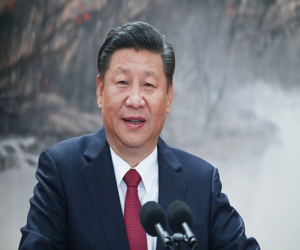

In [53]:
from PIL import Image
import requests
from IPython.display import display

hit_img = Image.open(requests.get(hit, stream=True).raw).resize((300,250))
display(hit_img)

## Upload Image Annotation

### Bounding Box

Below is an example of how to label a new rectangular bounding box for a region.
- The bounding box normalized to the data dimension to be within [0-1.0]

In [ ]:
#input upload
url = "https://samples.clarifai.com/BarackObama.jpg"
input_object.upload_from_url(input_id="bbox",image_url=url)

In [ ]:
#annotation upload
#annotations=[x_min, y_min, x_max, y_max]
bbox_points = [.1,.1,.8,.9]
annotation = input_object.get_annotation_proto(input_id="bbox", label="face", annotations=bbox_points)
input_object.upload_annotations([annotation])

### Polygon

An example of how to provide annotations within any polygon-shaped region of an image.

These are the list of points that connect together to form a polygon:
- row—The row location of the point. This has a [0.0-1.0] range with 0.0 being top row and 1.0 being the bottom row;
- col—The column location of the point. This has a [0.0-1.0] range with 0.0 being left col and 1.0 being the right col;

In [ ]:
#input upload
url = "https://samples.clarifai.com/airplane.jpeg"
input_object.upload_from_url(input_id="mask",image_url=url)

In [ ]:
#annotation upload
#polygons=[[[x,y],...,[x,y]],...]
polygon_pts = [[.15,.24],[.4,.78],[.77,.62],[.65,.15]]
annotation = input_object.get_mask_proto(input_id="mask", label="airplane", polygons=polygon_pts)
input_object.upload_annotations([annotation])

## Upload Text Annotation

In [ ]:
url = "https://samples.clarifai.com/featured-models/Llama2_Conversational-agent.txt"
concepts = ["mobile","camera"]
input_object.upload_from_url(input_id="text1",text_url=url, labels=concepts)

## Custom Functions

- This example shows removing unicode from text and uploading them to Clarifai Platform.
- You can add your own custom functionalities with ease

In [ ]:
def remove_unicode_and_upload(input_id, text):
    string_encode = text.encode("ascii", "ignore")
    string_decode = string_encode.decode()
    input_object.upload_text(input_id=input_id,raw_text=string_decode)

In [ ]:
remove_unicode_and_upload(input_id='demo',text = "This is a test \u200c example. ")

## Clarifai Resources

**Website**: [https://www.clarifai.com](https://www.clarifai.com/)

**Demo**: [https://clarifai.com/demo](https://clarifai.com/demo)

**Sign up for a free Account**: [https://clarifai.com/signup](https://clarifai.com/signup)

**Developer Guide**: [https://docs.clarifai.com](https://docs.clarifai.com/)

**Clarifai Community**: [https://clarifai.com/explore](https://clarifai.com/explore)

**Python SDK Docs**: [https://docs.clarifai.com/python-sdk/api-reference](https://docs.clarifai.com/python-sdk/api-reference)

---